<a href="https://colab.research.google.com/github/abdurrazzz/OIBSIP/blob/main/cardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
url = 'https://github.com/RimjimRazdan/cars_price_prediction/raw/master/car%20data.csv'
cars = pd.read_csv(url)

In [ ]:
cars.head

<bound method NDFrame.head of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1    

In [ ]:
cars.shape

(301, 9)

In [ ]:
cars.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

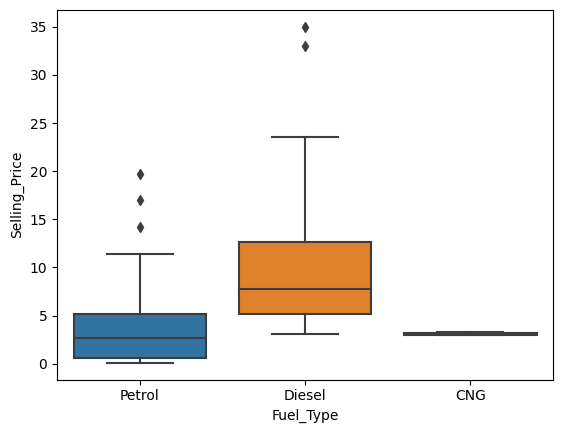

In [ ]:
sns.boxplot(x=cars.Fuel_Type,y=cars.Selling_Price)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

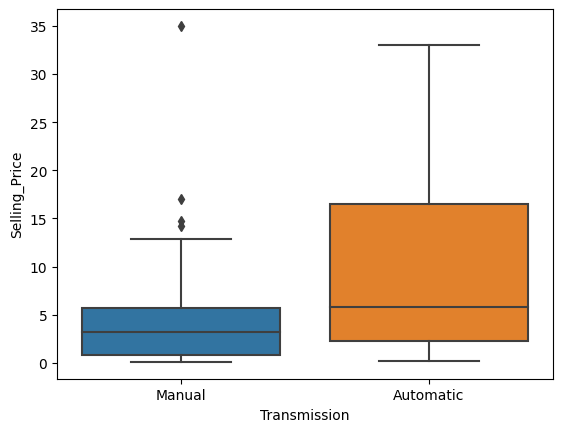

In [ ]:
sns.boxplot(x=cars.Transmission,y=cars.Selling_Price)

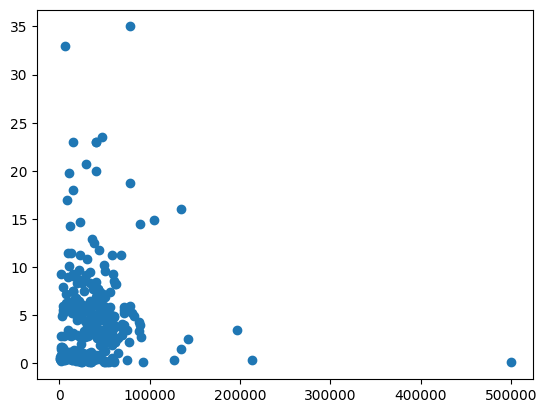

In [ ]:
plt.scatter(x=cars['Kms_Driven'],y=cars['Selling_Price'])
plt.show('Kms_Driven v/s Selling_Price')

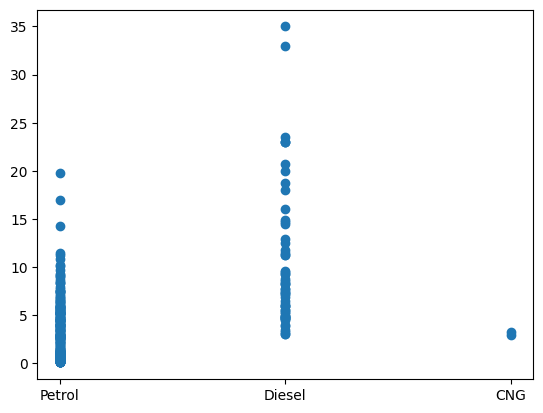

In [ ]:
plt.scatter(x=cars['Fuel_Type'],y=cars['Selling_Price'])
plt.show('Fuel_Type v/s Selling_Price')

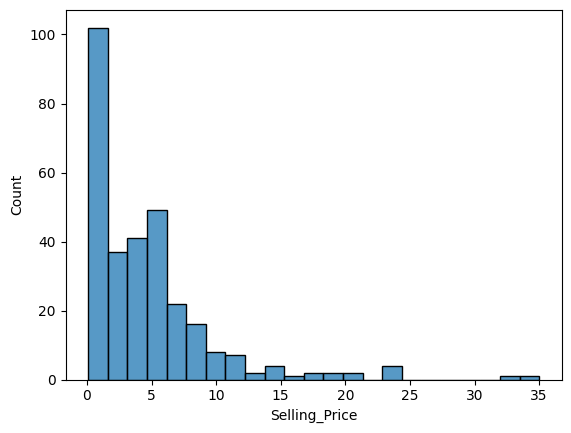

In [ ]:
sns.histplot(cars['Selling_Price'])
plt.show()

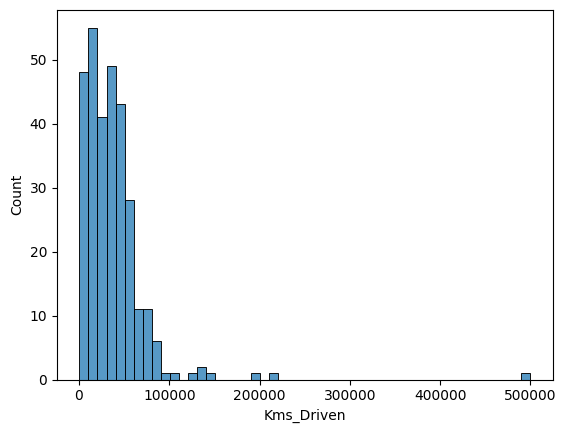

In [ ]:
sns.histplot(cars['Kms_Driven'])
plt.show()

<ipython-input-44-667b9b04d9a0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cars.corr()


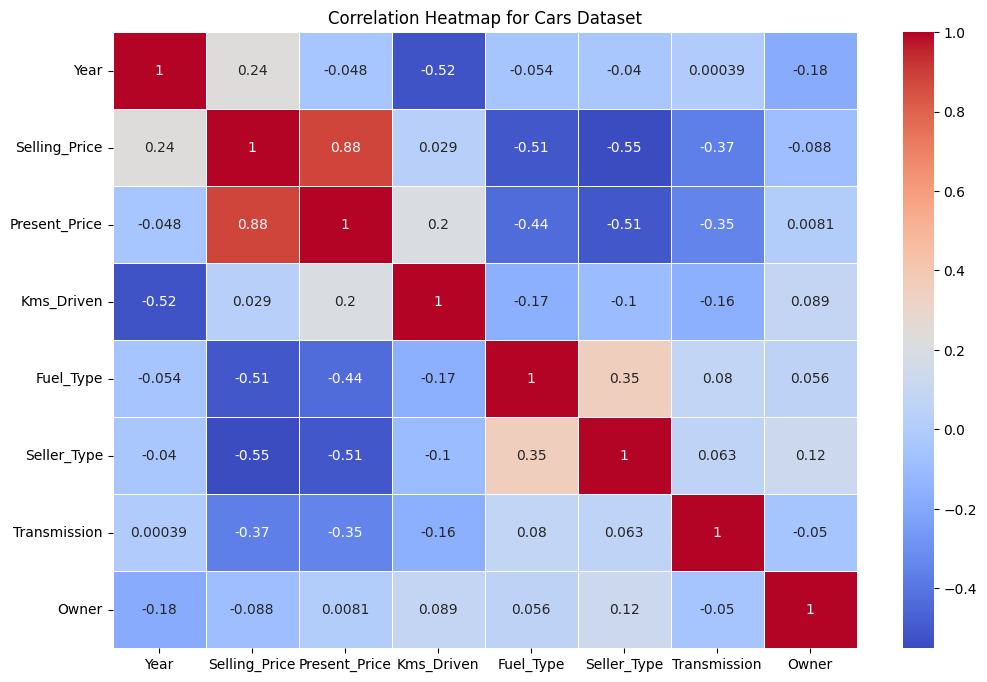

In [ ]:
label_encoder = LabelEncoder()
cars['Fuel_Type'] = label_encoder.fit_transform(cars['Fuel_Type'])
cars['Seller_Type'] = label_encoder.fit_transform(cars['Seller_Type'])
cars['Transmission'] = label_encoder.fit_transform(cars['Transmission'])
correlation_matrix = cars.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Cars Dataset')
plt.show()

In [ ]:
X = cars.drop('Car_Name', axis=1)
y = cars['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
lin_reg.fit(X_train,y_train)
print(f"Root Mean Squared Error (RMSE): {rmse}",)
new_data = X_test.iloc[0].values.reshape(1, -1)
prediction = lin_reg.predict(new_data)
print(f"Predicted Price for the new data point: {prediction[0]}")

Root Mean Squared Error (RMSE): 2.4805560357562352e-12
Predicted Price for the new data point: 0.34999999999804365


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
